# Analysis Plan
## Brody Coyne
### 12/8/2022

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import json
import base64
import requests

from sklearn.cluster import KMeans

In [2]:
nbadata = pd.read_csv("nbadatadec07.csv")

Data source:https://www.basketball-reference.com/leagues/NBA_2023_per_game.html
This data comes from Basketball Reference and it has every single NBA player that has recorded a statistic. It has a significant amount of different statistics that it collects. Even though I won't use a lot of the stats in my analysis it is helpful to have so many options.

In [3]:
nbadata

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS▼,Player-additional
0,1,Luka Dončić,PG,23,DAL,23,23,36.8,11.3,22.4,...,0.8,7.7,8.6,8.7,1.7,0.7,3.7,2.9,32.9,doncilu01
1,2,Giannis Antetokounmpo,PF,28,MIL,19,19,32.9,11.7,21.6,...,2.1,9.3,11.3,5.5,0.8,1.1,3.7,3.4,31.9,antetgi01
2,3,Joel Embiid,C,28,PHI,16,16,35.3,10.4,20.2,...,1.6,7.9,9.6,4.9,1.1,1.8,4.1,3.3,31.9,embiijo01
3,4,Shai Gilgeous-Alexander,SG,24,OKC,22,22,35.7,10.7,21.1,...,1.0,3.8,4.8,6.0,1.8,1.1,3.3,2.5,31.3,gilgesh01
4,5,Jayson Tatum,PF,24,BOS,24,24,37.0,10.1,21.0,...,1.1,7.2,8.3,4.2,1.0,1.0,2.8,2.3,30.8,tatumja01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,477,Cody Martin,SF,27,CHO,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,martico01
477,478,Trevelin Queen,PG,25,IND,2,0,10.0,0.0,1.5,...,0.5,1.0,1.5,1.0,0.5,0.5,1.5,0.5,0.0,queentr01
478,479,Dereon Seabron,SG,22,NOP,2,0,1.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,seabrde01
479,480,Marko Simonovic,C,23,CHI,1,0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,simonma01


Before clustering I wanted to look at some specific elements of the data to help me get a better understanding of the data as a whole.

(array([41., 35., 46., 48., 59., 31., 44., 24., 25., 15., 15., 15., 18.,
         7.,  8., 12., 10.,  8.,  4.,  3.,  3.,  2.,  3.,  2.,  3.]),
 array([ 0.   ,  1.316,  2.632,  3.948,  5.264,  6.58 ,  7.896,  9.212,
        10.528, 11.844, 13.16 , 14.476, 15.792, 17.108, 18.424, 19.74 ,
        21.056, 22.372, 23.688, 25.004, 26.32 , 27.636, 28.952, 30.268,
        31.584, 32.9  ]),
 <BarContainer object of 25 artists>)

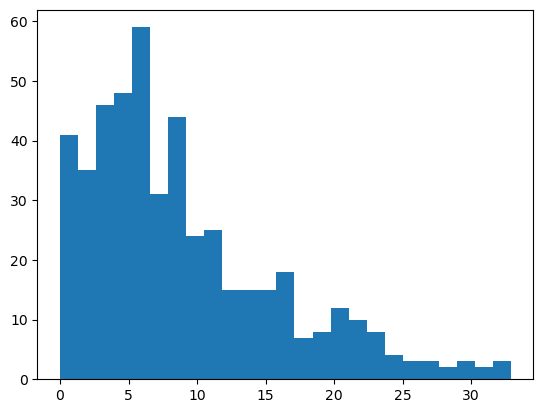

In [4]:
fig, ax1 = plt.subplots()
nba_dat_hist = nbadata['PTS▼']
ax1.hist(nba_dat_hist, bins = 25)

(array([ 47.,   1.,   2.,  10.,  11.,  28.,  32.,  49., 101.,  74.,  45.,
         21.,  10.,   0.,   1.,   2.,   2.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   5.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

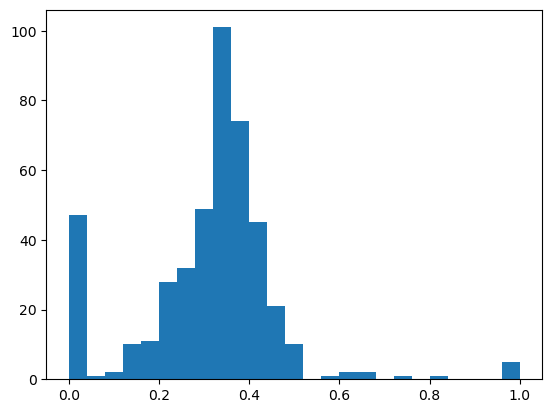

In [5]:
fig, ax1 = plt.subplots()
nba_dat_hist = nbadata['3P%']
ax1.hist(nba_dat_hist, bins = 25)

I'm not sure if I really like how this is visualized but I would like to find some way to look at the differences in rebounds and assists between players.

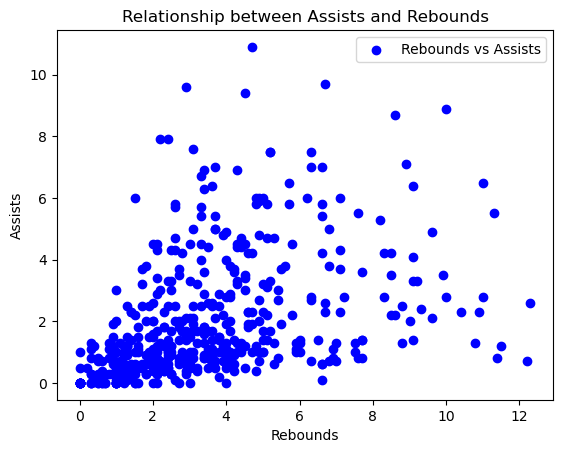

In [21]:
fig1, ax1 = plt.subplots()
ax1.scatter(nbadata['TRB'], nbadata['AST'], label = "Rebounds vs Assists", color = 'blue')
ax1.set_xlabel('Rebounds')
ax1.set_ylabel('Assists')
ax1.set_title('Relationship between Assists and Rebounds')
ax1.legend()
plt.show()

I am now starting to mess around with clustering to try to find the best way to cluster the data and also visualize the clustering. I'm not sure if I'm satisfied with the stats I chose to cluster with and I'm also definitely not satisfied with how the clustering is visualized. So I working on improving both of those elements. 

C:\Users\brody\anaconda3\envs\data-fa22\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


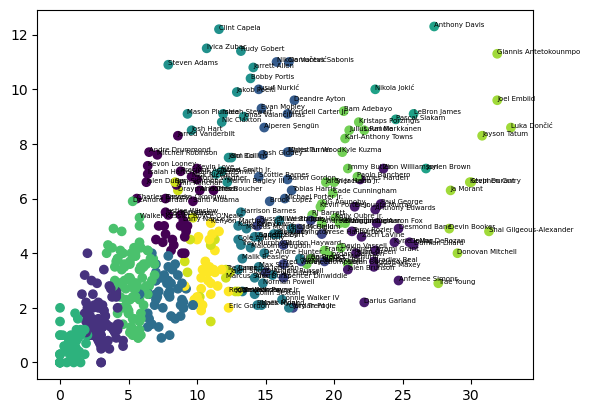

In [20]:
features = ['PTS▼', 'TRB', 'AST', 'STL', 'BLK']
kmeans = KMeans(n_clusters=15)
nbadata['cluster'] = kmeans.fit_predict(nbadata[features])
plt.scatter(nbadata['PTS▼'], nbadata['TRB'], c=nbadata['cluster'], cmap='viridis')

for index, row in nbadata.iterrows():
  if row['PTS▼'] > 12 or row['TRB'] > 5:
    plt.annotate(row['Player'], (row['PTS▼'], row['TRB']), fontsize=5)
    

plt.show()

Some of the improvements I want to make for my next checkpoint are to improve the pre-clustering analysis like improving my histograms and scatter plots. I also want to add some more elements to make my project more unique. After that I want to focus on my clustering. I explained some of my problems with my clustering earlier, but I also want to add some new elements like maybe listing out some of the players in the top clusters and providing some analysis.